In [1]:
from google.colab import files
# To allow access to read google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Method I**

In [2]:
!cp /content/drive/MyDrive/Lectures_ML/Week_7/Session_1/elm.py /content

# **Method II**

In [ ]:
files.upload()

Saving elm.py to elm.py


{'elm.py': b"# Final edited date: 2018.3.7\n# Author: Li Xudong, from NSSC.CAS Beijing\n# Version: 1.0\n# Description: Extreme Learning Machine (ELM) class\n# Methods:\n#   fit(algorithm)\n#   predict(x)\n#   score(x, y)\nimport numpy as np\nfrom scipy.linalg import pinv2, inv\nimport time\n\nclass elm():\n    '''\n    Function: elm class init\n    -------------------\n    Parameters:\n    shape: list, shape[hidden units, output units]\n        numbers of hidden units and output units\n    activation_function: str, 'sigmoid', 'relu', 'sin', 'tanh' or 'leaky_relu'\n        Activation function of neurals\n    x: array, shape[samples, features]\n        train data\n    y: array, shape[samples, ]\n        labels\n    C: float\n        regularization parameter\n    elm_type: str, 'clf' or 'reg'\n        'clf' means ELM solve classification problems, 'reg' means ELM solve regression problems.\n    one_hot: bool, Ture or False, default True \n        The parameter is useful only when elm_type

# **Including all required packages/libraries**

In [3]:
import elm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_digits, load_diabetes, make_regression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

stdsc = StandardScaler()
# **********************************
# irises dataset classification
# **********************************
print("irises dataset classification>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
# load dataset
iris = load_iris()
irx, iry = stdsc.fit_transform(iris.data), iris.target

print("irx shape:", irx.shape)
print("iry shape:", iry.shape)
x_train, x_test, y_train, y_test = train_test_split(irx, iry, test_size=0.2)


irises dataset classification>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
irx shape: (150, 4)
iry shape: (150,)


In [4]:
y_train, y_train.shape

(array([2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2,
        0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1,
        0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1,
        1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0,
        0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2,
        2, 0, 0, 0, 0, 0, 0, 2, 1, 2]), (120,))

In [5]:
# built model and train
model = elm.elm(hidden_units=10, activation_function='relu', random_type='normal', x=x_train, y=y_train, C=0.1, elm_type='clf')
beta, train_accuracy, running_time = model.fit('solution2')

In [6]:
# Printing results
print("classifier beta:\n", beta)
print("classifier train accuracy:", train_accuracy)
print('classifier running time:', running_time)

classifier beta:
 [[ 3.74210278e-01 -3.19227819e-01 -4.60206758e-02]
 [-3.61806306e-02  1.35920089e-02  1.01411327e-01]
 [ 8.37951038e-02 -1.32676694e-01  6.65903323e-03]
 [-3.53332811e-04  2.33999893e-03 -9.47763295e-04]
 [ 6.03776461e-03  4.03461487e-01  1.48303669e-01]
 [-3.43682986e-02 -2.51538597e-01  3.59075901e-01]
 [ 2.26199733e-01 -2.16040335e-01 -6.95152625e-02]
 [ 6.00831130e-02  1.22455046e-01 -3.72668407e-02]
 [ 6.09084139e-03 -2.07109641e-01  3.66614478e-01]
 [-1.04648376e-01  1.62547526e-01  3.47187469e-03]]
classifier train accuracy: 0.95
classifier running time: 0.001482999999999901


In [7]:
# test
prediction = model.predict(x_test)
print("classifier test prediction:", prediction)
print('classifier test accuracy:', model.score(x_test, y_test))

# # *******************************
# # handwritten number dataset
# # *******************************
# print("handwritten number dataset classification>>>>>>>>>>>>>>>>>>>>>>>>")
# # load dataset
# digits = load_digits()
# dgx, dgy = stdsc.fit_transform(digits.data/16.0), digits.target
# print("dgx shape:", dgx.shape)
# print("dgy shape:", dgy.shape)
# x_train, x_test, y_train, y_test = train_test_split(irx, iry, test_size=0.2)

# # build model and train
# model = elm.elm(hidden_units=32, activation_function='relu', random_type='normal', x=x_train, y=y_train, C=0.1, elm_type='clf')
# beta, train_accuracy, running_time = model.fit('solution2')
# print("classifier beta:\n", beta)
# print("classifier train accuracy:", train_accuracy)
# print('classifier running time:', running_time)

# # test
# prediction = model.predict(x_test)
# print("classifier test prediction:", prediction)
# print('classifier test accuracy:', model.score(x_test, y_test))


classifier test prediction: [0 1 1 1 1 0 2 2 2 0 2 2 0 1 2 2 1 0 1 2 2 1 1 2 0 0 2 2 1 2]
classifier test accuracy: 0.9


# **Regression Example**

No handles with labels found to put in legend.


regression problem>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
regression beta:
 [[-1.84485056e+11]
 [ 4.26510932e+05]
 [ 3.51374295e+08]
 [ 1.37276008e+11]
 [-5.73095483e+10]
 [ 3.05461169e+06]
 [-3.28339421e+06]
 [ 8.86455033e+07]
 [-2.85508010e+10]
 [-7.91074368e+10]
 [ 4.73450571e+10]
 [ 2.02856414e+11]
 [-4.02214382e+10]
 [-6.33396268e+10]
 [ 1.92358205e+11]]
regression train score: 0.20321139465244914
regression running time: 0.00042000000000008697
regression result: [ 1.78344727e-01 -2.00653076e-02 -1.47155762e-01 -2.18521118e-01
 -2.47940063e-01 -2.46826172e-01 -2.24838257e-01 -1.90002441e-01
 -1.48757935e-01 -1.06491089e-01 -6.71234131e-02 -3.37219238e-02
 -8.33129883e-03  7.58361816e-03  1.33972168e-02  8.89587402e-03
 -5.58471680e-03 -2.93426514e-02 -6.14776611e-02 -1.00738525e-01
 -1.45690918e-01 -1.95037842e-01 -2.47116089e-01 -3.00567627e-01
 -3.53744507e-01 -4.05288696e-01 -4.53826904e-01 -4.98123169e-01
 -5.37063599e-01 -5.69717407e-01 -5.95260620e-01 -6.12960815e-01
 -6.22

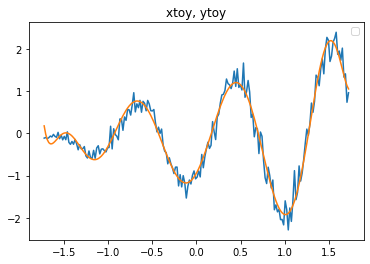

In [9]:
# **************************
# regression problem
# **************************
print("regression problem>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
# generate dataset
x = np.arange(0.25, 20, 0.1).reshape(-1, 1)
y = x * np.cos(x) + 0.5 * np.sqrt(x) * np.random.randn(x.shape[0]).reshape(-1, 1)
xtoy, ytoy = stdsc.fit_transform(x), stdsc.fit_transform(y)

# build model and train
model = elm.elm(hidden_units=15, activation_function='sigmoid', random_type='normal', x=xtoy, y=ytoy, C=1, elm_type='reg')  # normal分布效果好
beta, train_score, running_time = model.fit('no_re')
print("regression beta:\n", beta)
print("regression train score:", train_score)
print("regression running time:", running_time)

# test
prediction = model.predict(xtoy)
print("regression result:", prediction.reshape(-1, ))
print("regression score:", model.score(xtoy, ytoy))

# plot
plt.plot(xtoy, ytoy)
plt.plot(xtoy, prediction)
plt.title('xtoy, ytoy')
plt.legend()
plt.show()